# Supply Chain Management – Exploratory Data Analysis (EDA)

## Objective
This notebook performs **industry-style exploratory data analysis** after preprocessing. The goal is to:
- Identify demand, quality, and logistics risks
- Generate business insights
- Provide recommendations to support forecasting and inventory decisions


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Global style settings (industry standard)
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.titleweight'] = 'bold'
sns.set_palette('Set2')

## 2. Load Dataset

In [2]:
data_path = 'supply_chain_data.csv'
df = pd.read_csv(data_path)

df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## 3. Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


### Interpretation
- Dataset contains **100 records and 24 features**
- No missing values
- Mix of numeric and categorical operational variables
- Suitable for classical ML and forecasting

## 4. Revenue Analysis by Product Type

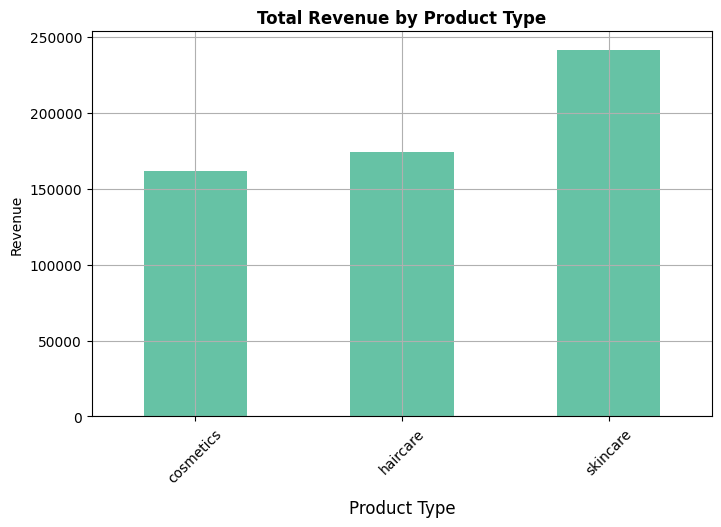

In [7]:
revenue_by_product = df.groupby('Product type')['Revenue generated'].sum()

revenue_by_product.plot(kind='bar')
plt.title('Total Revenue by Product Type')
plt.ylabel('Revenue')
plt.xlabel('Product Type', labelpad=10, fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Interpretation
- Cosmetics generate the highest revenue
- Revenue concentration implies higher business risk

## 5. Demand Distribution Analysis

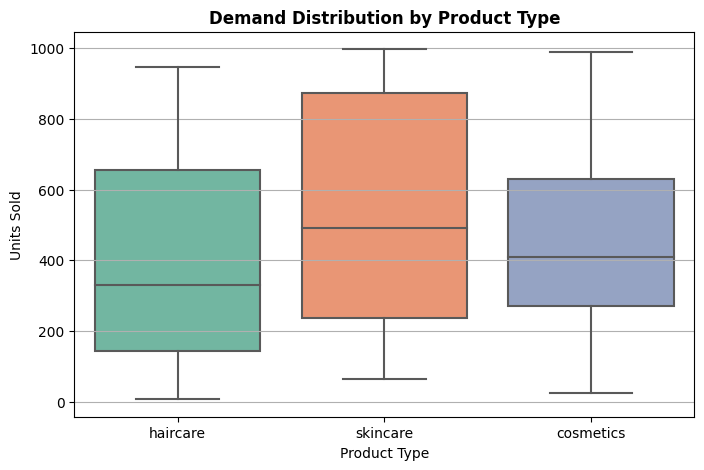

In [8]:
sns.boxplot(x='Product type', y='Number of products sold', data=df)
plt.title('Demand Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Units Sold')
plt.show()

### Interpretation
- Cosmetics show high demand variability
- Skincare demand is relatively stable
- Variability justifies forecasting models.

## 6. Lead Time Analysis

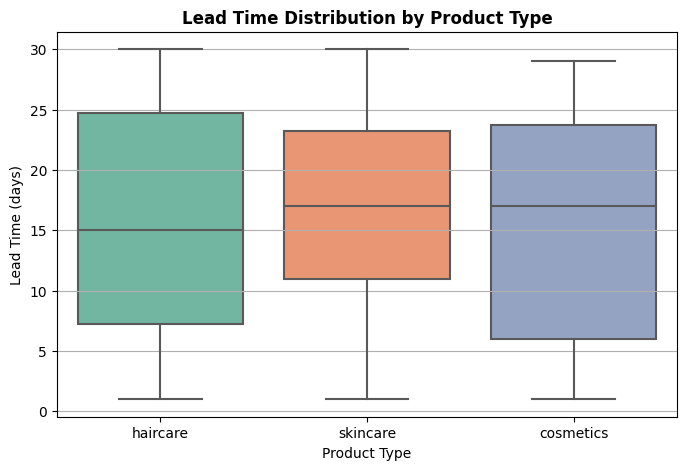

In [9]:
sns.boxplot(x='Product type', y='Lead times', data=df)
plt.title('Lead Time Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Lead Time (days)')
plt.show()

### Interpretation
- Similar median lead times across products
- High variability for haircare and cosmetics increases planning uncertainty

## 7. Quality Analysis – Defect Rates

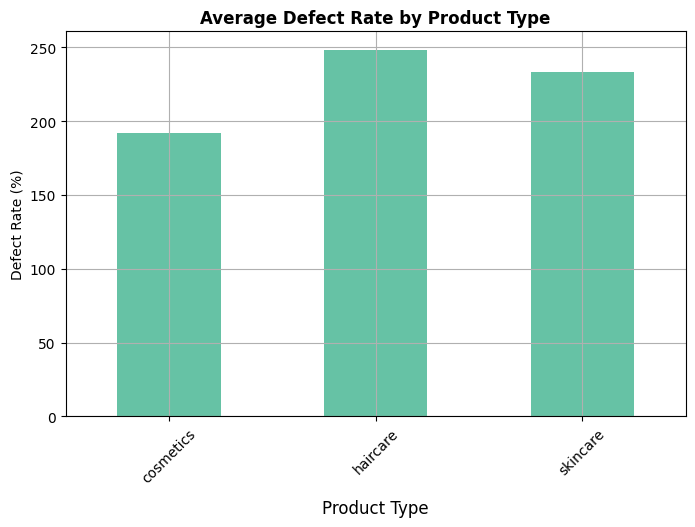

In [11]:
defect_by_product = df.groupby('Product type')['Defect rates'].mean() * 100

defect_by_product.plot(kind='bar')
plt.title('Average Defect Rate by Product Type')
plt.ylabel('Defect Rate (%)')
plt.xlabel('Product Type', labelpad=10, fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Interpretation
- Haircare has the highest defect rates
- Indicates supplier or process quality issues

## 8. Cost vs Revenue Analysis

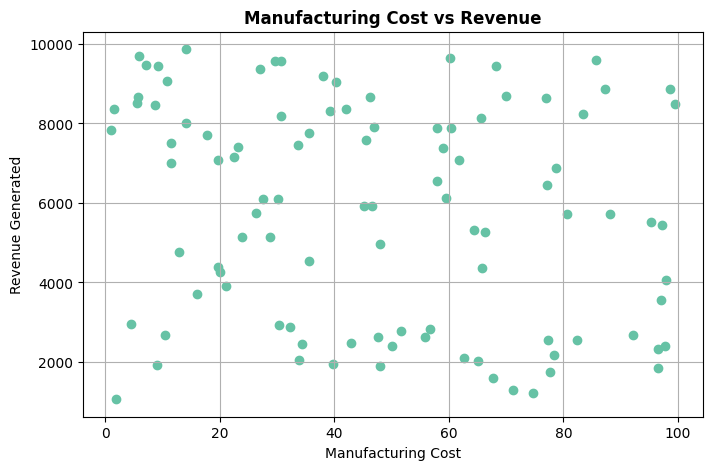

In [12]:
plt.scatter(df['Manufacturing costs'], df['Revenue generated'])
plt.title('Manufacturing Cost vs Revenue')
plt.xlabel('Manufacturing Cost')
plt.ylabel('Revenue Generated')
plt.show()

### Observation
Increasing manufacturing investment does not guarantee higher revenue for these products. Other factors (e.g., marketing, demand) are likely driving revenue.

### Interpretation
Increasing manufacturing investment does not guarantee higher revenue for these products. Other factors (e.g., marketing, demand) are likely driving revenue.


Pearson Correlation Coefficient: -0.2140
P-value: 0.0325


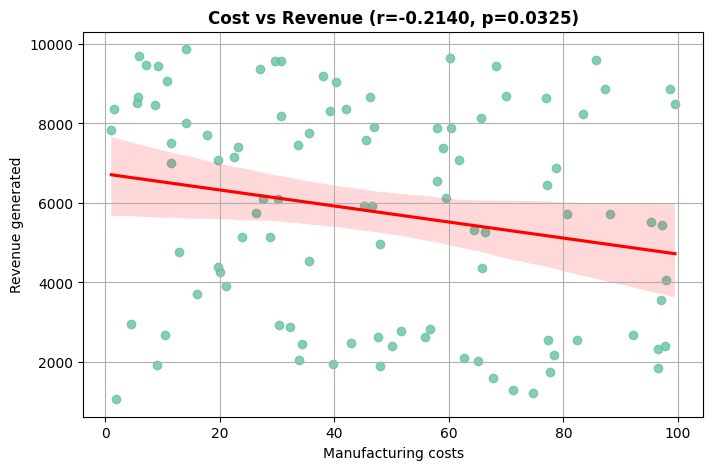

In [16]:
from scipy.stats import pearsonr

# Assuming your data is in a pandas DataFrame called 'df'
column1 = df['Manufacturing costs']
column2 = df['Revenue generated']

correlation, p_value = pearsonr(df['Manufacturing costs'], df['Revenue generated'])

print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

# Creates the scatterplot with a regression line
sns.regplot(x='Manufacturing costs', y='Revenue generated', data=df, 
            scatter_kws={'color': '#66c2a5'}, line_kws={'color': 'red'})

plt.title(f'Cost vs Revenue (r={correlation:.4f}, p={p_value:.4f})')
plt.show()


### Observation
There is a slight inverse relationship; as costs go up, revenue tends to go down.

### Interpretation
Unlike your initial guess, spending more on manufacturing in this dataset actually correlates with slightly lower revenue.

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


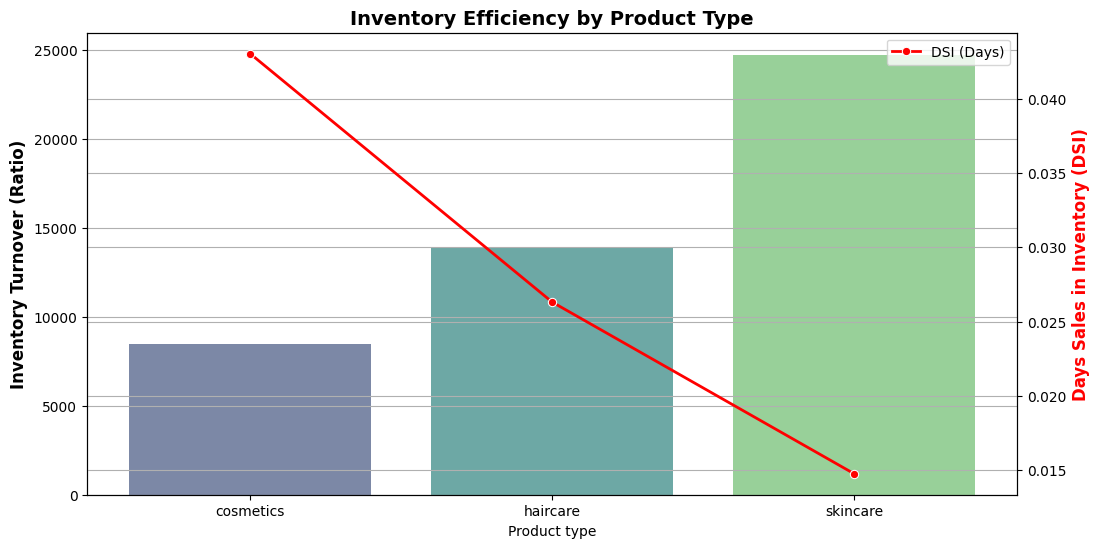

In [17]:
# 1. Calculate Core Metrics
df['COGS'] = df['Manufacturing costs'] * df['Number of products sold']

# 2. Group by Product Type
inventory_metrics = df.groupby('Product type').agg({
    'Number of products sold': 'sum',
    'Stock levels': 'mean',
    'COGS': 'sum'
}).reset_index()

# 3. Calculate Turnover and DSI
inventory_metrics['Inventory_Turnover'] = inventory_metrics['COGS'] / (inventory_metrics['Stock levels'] + 1)
inventory_metrics['DSI'] = 365 / inventory_metrics['Inventory_Turnover']

# 4. Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Turnover (Bar)
sns.barplot(data=inventory_metrics, x='Product type', y='Inventory_Turnover', ax=ax1, palette='viridis', alpha=0.7)
ax1.set_ylabel('Inventory Turnover (Ratio)', fontsize=12, fontweight='bold')
ax1.set_title('Inventory Efficiency by Product Type', fontsize=14)

# Plot DSI (Line on secondary axis)
ax2 = ax1.twinx()
sns.lineplot(data=inventory_metrics, x='Product type', y='DSI', ax=ax2, color='red', marker='o', linewidth=2, label='DSI (Days)')
ax2.set_ylabel('Days Sales in Inventory (DSI)', color='red', fontsize=12, fontweight='bold')

plt.show()


### Observation
The perfect downward slope of the red line (DSI) against the rising bars (Turnover) confirms **as turnover increases, the days to sell that inventory decrease**.

### Interpretation
- Skincare has the highest turnover, indicating it is the most efficient and fastest-moving product category. 

- Cosmetics inventory moves slower than other types, resulting in a higher DSI and increased holding costs.

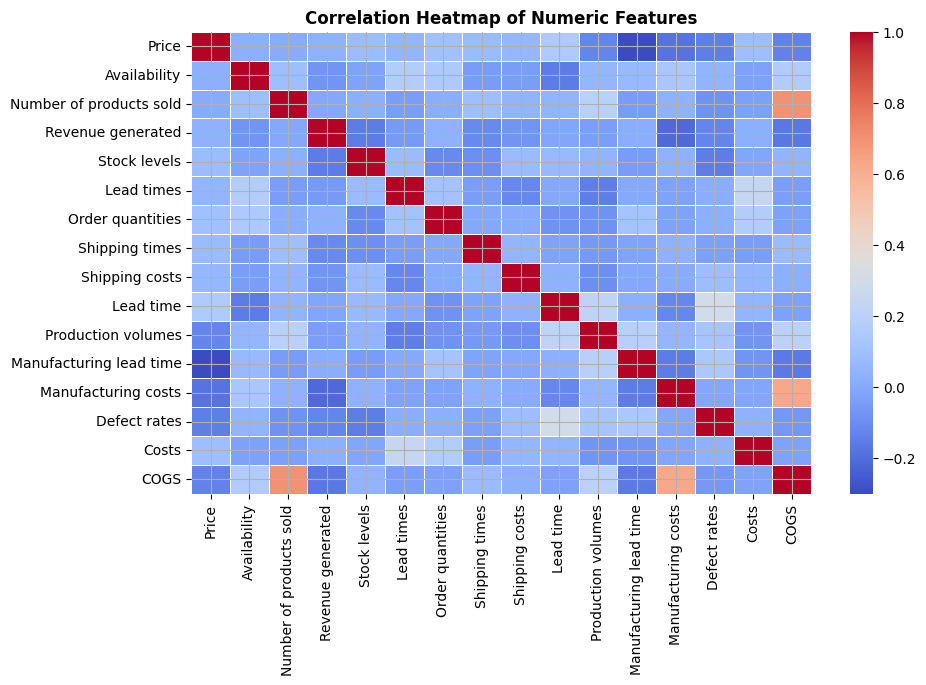

In [18]:

numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Observation
The map reveals that most features in this dataset are weakly correlated (shown in light blue), meaning changes in one variable don't predictably cause changes in another.

### Interpretation
- **Strong Relationship:** Total costs are driven primarily by sales volume rather than unit price fluctuations.
- **Zero Relationship:** Lead times, defect rates, and shipping costs are not yet hurting the top-line revenue, but they represent hidden risks.
- **Weak Relationship:** Simply increasing prices may not lead to higher returns and that demand is likely driven by other factors like product type or brand loyalty.

## 11. Key Insights 

- **Inventory Velocity Paradox:** 
While Skincare has the highest turnover and lowest DSI (Days Sales in Inventory), it may be under-stocked, whereas Cosmetics generates significant revenue but moves much slower, tying up capital.

- **Cost-Revenue Disconnection:**
 The weak Pearson correlation between manufacturing cost and revenue proves that "premium" production costs do not guarantee "premium" sales performance.

- **Quality & Logistics Risk:**
  Although not strongly correlated to revenue yet, the variability in haircare quality and lead times creates a fragile supply chain that could break during high-demand periods. 

## 12. Business Recommendations
1) **Short-Term**
- Rebalance Inventory: Shift stock buffers from cosmetics to skincare to prevent stockouts in high-velocity categories.
- Supplier Audit: Investigate the root causes of lead time variability and defect rates specifically in the haircare segment.

2) **Medium-Term**
- Dynamic Pricing: Test price sensitivity for high-turnover skincare items to see if margins can be improved without slowing down velocity.
- Safety Stock Policy: Implement a "Safety Stock" formula that accounts for the high lead-time variability identified in the heatmap.

3) **Long-Term**
- Integrated Forecasting: Move from descriptive analytics to Machine Learning (ML) models to predict demand spikes before they impact DSI.
- Supplier Tiering: Categorize suppliers based on their reliability (low lead-time variance) rather than just their cost.

## 13. Conclusion
This EDA highlights a critical trade-off between high-volume efficiency (Skincare) and high-value concentration (Cosmetics). While the supply chain is currently functional, the lack of correlation between cost and revenue suggests a need for better-optimized production spending. The insights gathered here provide a validated feature set for the next phase of predictive modeling.